Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'XMR'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,1.898070,1.647920,1.841200,1.768350,291633.0,1.768350
2014-09-17,1.741810,1.504760,1.741810,1.569280,253082.0,1.569280
2014-09-18,1.590900,1.376020,1.567750,1.454370,171739.0,1.454370
2014-09-19,1.567370,1.174460,1.442590,1.271210,362626.0,1.271210
2014-09-20,1.414170,1.174950,1.267670,1.274150,239591.0,1.274150
...,...,...,...,...,...,...
2021-06-16,281.438416,262.130615,262.387634,277.109039,194978104.0,277.109039
2021-06-17,279.950592,261.215363,277.186981,264.844513,277892540.0,264.844513
2021-06-18,282.374939,264.543274,266.102173,270.520721,264783505.0,270.520721


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2466 entries, 2014-09-16 to 2021-06-22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2466 non-null   float64
 1   Low        2466 non-null   float64
 2   Open       2466 non-null   float64
 3   Close      2466 non-null   float64
 4   Volume     2466 non-null   float64
 5   Adj Close  2466 non-null   float64
 6   Spread     2466 non-null   float64
dtypes: float64(7)
memory usage: 154.1 KB


## Plot the closing value of Monero over time

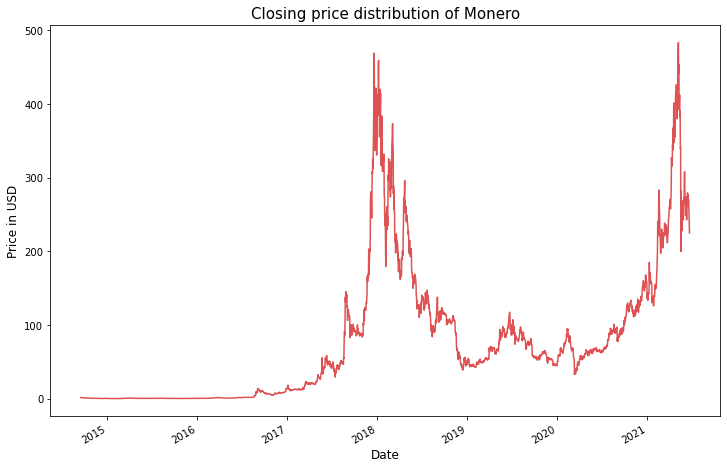

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of Monero", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,1.898070,1.647920,1.841200,1.768350,291633.0,1.768350
2014-09-17,1.741810,1.504760,1.741810,1.569280,253082.0,1.569280
2014-09-18,1.590900,1.376020,1.567750,1.454370,171739.0,1.454370
2014-09-19,1.567370,1.174460,1.442590,1.271210,362626.0,1.271210
2014-09-20,1.414170,1.174950,1.267670,1.274150,239591.0,1.274150
...,...,...,...,...,...,...
2021-06-16,281.438416,262.130615,262.387634,277.109039,194978104.0,277.109039
2021-06-17,279.950592,261.215363,277.186981,264.844513,277892540.0,264.844513
2021-06-18,282.374939,264.543274,266.102173,270.520721,264783505.0,270.520721


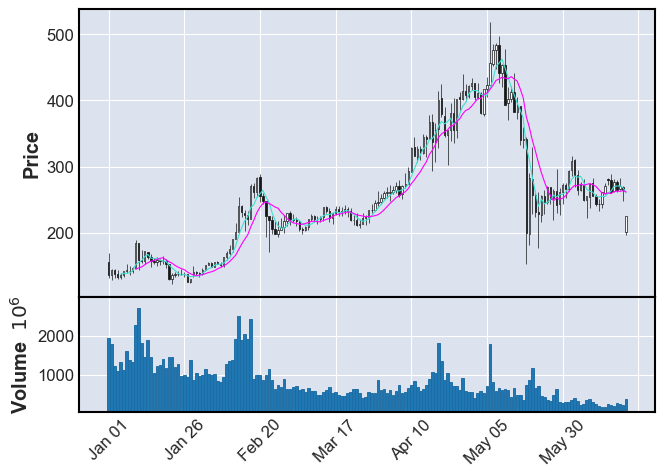

In [6]:
mpf.plot(temp_base_df.loc['2021-1-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [9]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2021-1-1']
price_predict_df

,ds,y
2295,2021-01-02,143.117218
2296,2021-01-03,138.064423
2297,2021-01-04,133.602768
2298,2021-01-05,136.825089
2299,2021-01-06,142.323288
...,...,...
2461,2021-06-16,277.109039
2462,2021-06-17,264.844513
2463,2021-06-18,270.520721
2464,2021-06-19,264.600861


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
172,2021-06-25,243.130103,215.565316,268.280934
173,2021-06-26,243.496148,215.909566,272.123125
174,2021-06-27,242.219291,213.383849,270.980140
175,2021-06-28,240.256314,210.595882,268.992799
176,2021-06-29,231.550207,201.976131,262.846674


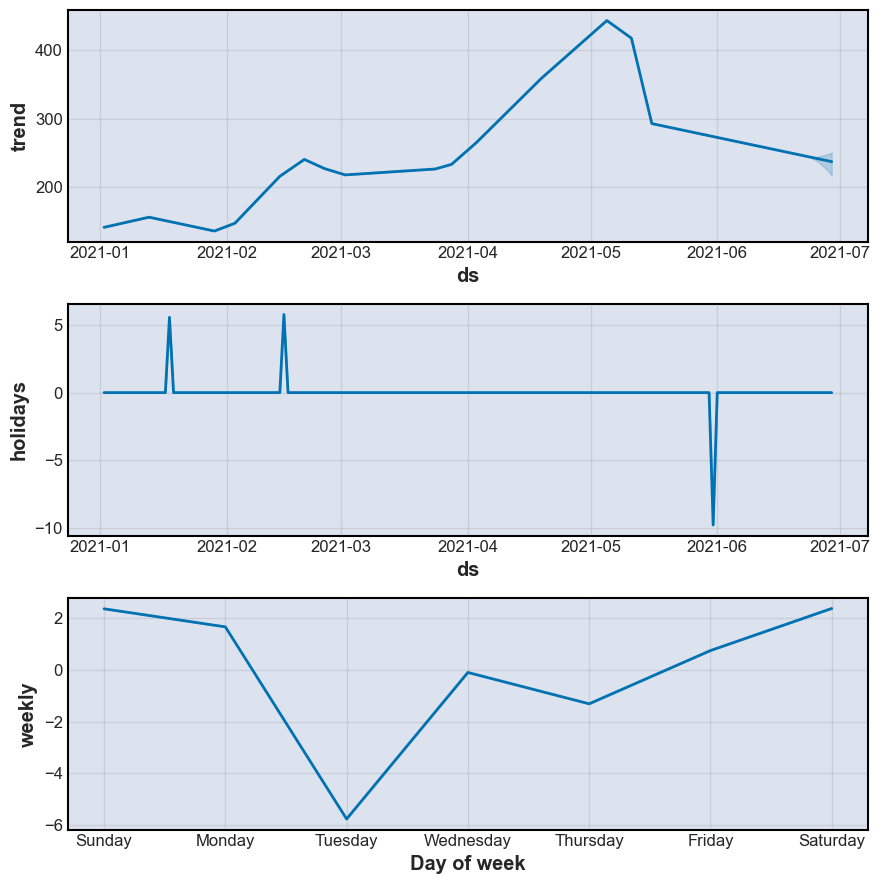

In [10]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=7)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

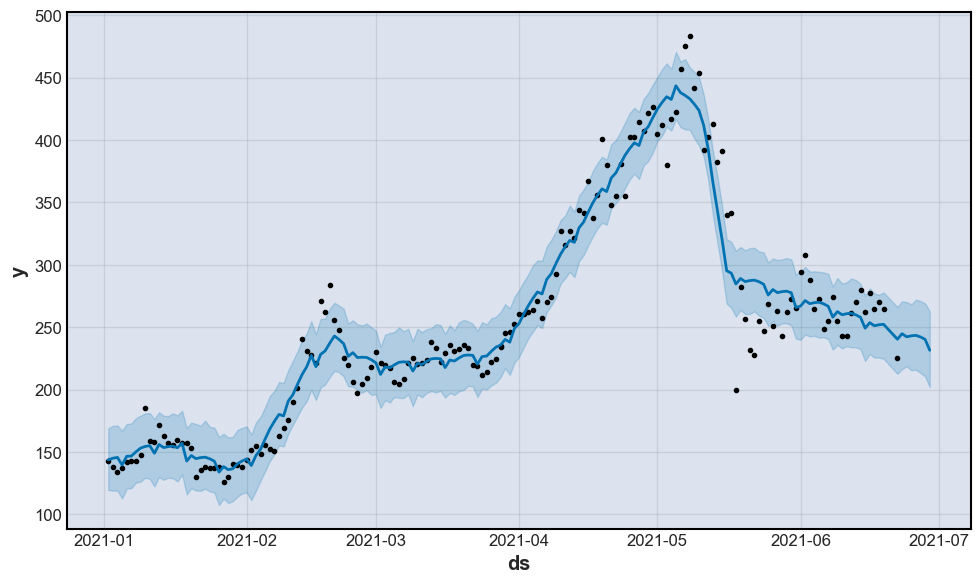

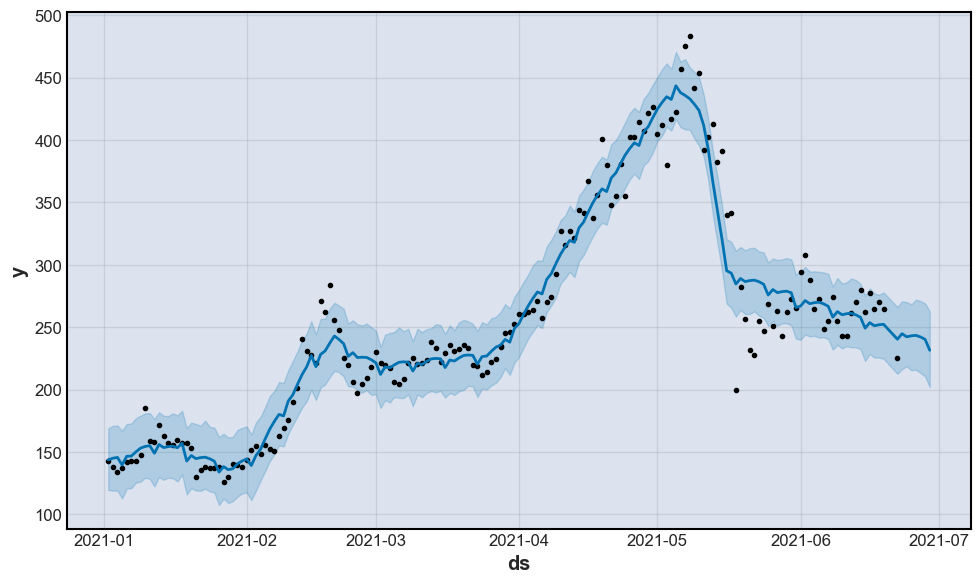

In [11]:
m.plot(forecast)